In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt , ExponentialSmoothing
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

In [13]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('meal_info.csv')
df2 = pd.read_csv('fulfilment_center_info.csv')
df2

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [15]:
# df = pd.merge(df,df1,on='meal_id')
# df.merge(df1, on='meal_id')
# df.merge(df2,on='center_id')

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


In [19]:
df_final = df.groupby('week')['num_orders'].sum()
df_final = pd.DataFrame(df_final)

In [21]:
df_final

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
141,776240
142,739661
143,759926


<Axes: xlabel='week'>

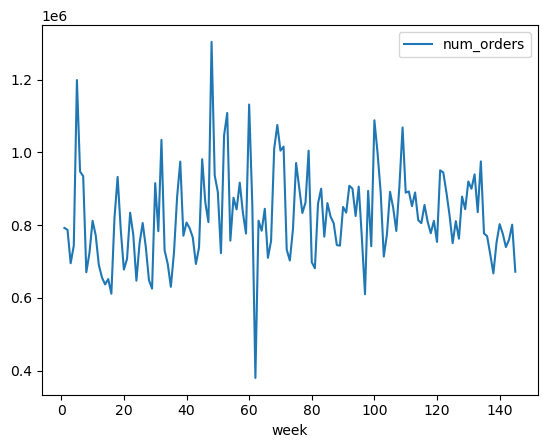

In [23]:
df_final.plot()

## SARIMA

In [25]:
y = df_final['num_orders']

In [27]:
y_train = y.iloc[:-7]
y_test = y.iloc[-7:]

In [29]:
model = auto_arima(y_train,trace=True,error_action='ignore', suppress_warnings=True , seasonal=True,m=52)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=3630.280, Time=2.19 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=3639.381, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3632.873, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3631.743, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=4157.805, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=3637.481, Time=0.65 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=3637.180, Time=1.16 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=3630.005, Time=10.02 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=3630.969, Time=8.59 sec
 ARIMA(2,0,2)(2,0,2)[52] intercept   : AIC=3633.107, Time=10.83 sec
 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=3633.027, Time=9.05 sec
 ARIMA(1,0,2)(2,0,1)[52] intercept   : AIC=3634.799, Time=7.80 sec
 ARIMA(2,0,1)(2,0,1)[52] intercept   : AIC=3635.984, Time=3.94 sec
 ARIMA(3,0,2)(2,0,1)[52] intercept   : AIC=3627.479, Time=10.46 sec
 ARIMA(3,0,2)(1,

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


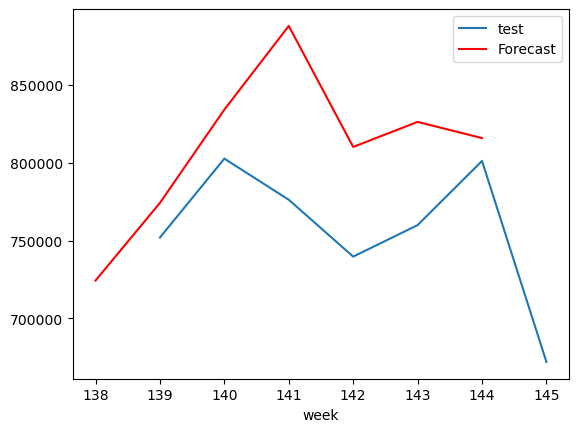

rmse 85227.81568670261


In [30]:

forecast = model.predict(n_periods = len(y_test))
y_test.plot(label='test')
forecast.plot(color='red',label='Forecast')
rmse = np.sqrt(mse(y_test,forecast))
# plt.text(50,100,"RMSE = "+ str(np.round(rmse,2)))
plt.legend(loc='best')
plt.show()
print('rmse', rmse)

## Holt winters Additive

rmse 54281.58203429217


C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


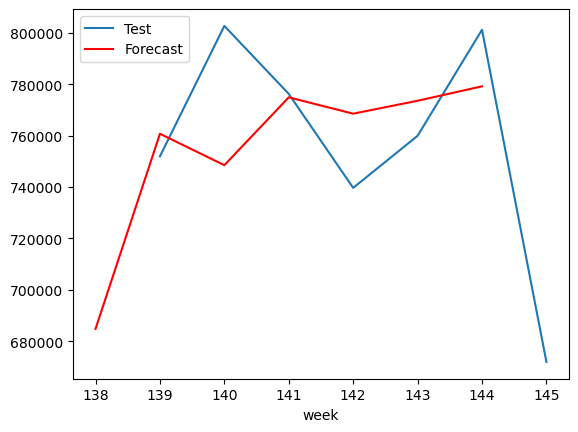

In [57]:
alpha , beta, gamma = 0.4,0.01,0.4
ex = ExponentialSmoothing(y_train,seasonal_periods=12,trend = 'add', seasonal='add')
model = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
forecast = model.forecast(len(y_test))
y_test.plot(label='Test')
forecast.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,forecast))
# plt.text(50,200,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')
print('rmse', rmse)

## Holt Winters Multiplicative

rmse 50342.29439848652


C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index w

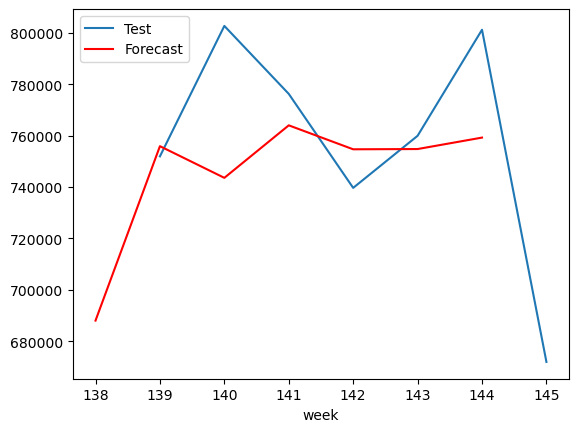

In [63]:
alpha , beta, gamma = 0.4,0.01,0.4
ex = ExponentialSmoothing(y_train,seasonal_periods=12,trend = 'add', seasonal='mul')
model = ex.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
forecast = model.forecast(len(y_test))
y_test.plot(label='Test')
forecast.plot(color='red',label = 'Forecast')
rmse = np.sqrt(mse(y_test,forecast))
# plt.text(50,200,'RMSE = ' + str(round(rmse,2)))
plt.legend(loc='best')
print('rmse', rmse)

### Predictions

### From Sarima Model - RMSE = 85227.81568670261
### From Holt Winters Additive Model RMSE = 54281.58203429217
### From Holt Winters Multiplicative Model RMSE = 50342.29439848652